In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout

In [175]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

data_path = '/content/drive/MyDrive/hmnist_28_28_RGB.csv/hmnist_28_28_RGB.csv'
data = pd.read_csv(data_path)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [176]:
data.label.value_counts()

,count
label,
4,6705
6,1113
2,1099
1,514
0,327
5,142
3,115


In [177]:
import os
import numpy as np
import pandas as pd
from PIL import Image

# Path to second dataset
data_dir = "/content/drive/MyDrive/all/all"

# List to store flattened image data
rows = []

for label in os.listdir(data_dir):
    folder = os.path.join(data_dir, label)
    if not os.path.isdir(folder):
        continue

    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)

        # Open and resize
        img = Image.open(img_path).convert('RGB').resize((28, 28))

        # Flatten (28x28x3 = 2352 values)
        img_array = np.array(img).flatten()

        # Add label at the end
        img_array = np.append(img_array, 7)  #all normal skin is labeled as 7

        rows.append(img_array)

# Convert to DataFrame
num_pixels = 28 * 28 * 3
columns = [f'pixel{str(i).zfill(4)}' for i in range(num_pixels)] + ['label']
df = pd.DataFrame(rows, columns=columns)

# Save as CSV
#df.to_csv('images_28x28_rgb.csv', index=False)
print("CSV created: images_28x28_rgb.csv")


CSV created: images_28x28_rgb.csv


In [178]:
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,39,39,38,45,46,43,56,57,52,66,...,66,69,61,54,56,50,37,37,37,7
1,12,12,12,13,13,13,12,12,12,12,...,13,13,13,13,13,13,12,12,12,7
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [179]:
data.shape

(10015, 2353)

In [180]:
df.shape

(3152, 2353)

In [181]:
data['label'].value_counts()

,count
label,
4,6705
6,1113
2,1099
1,514
0,327
5,142
3,115


In [182]:
data = pd.concat([data, df], ignore_index=True)

In [183]:
data['label'].value_counts()

,count
label,
4,6705
7,3152
6,1113
2,1099
1,514
0,327
5,142
3,115


In [184]:
data.shape

(13167, 2353)

In [185]:
y = data['label']
x = data.drop(columns = ['label'])

In [186]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [187]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (53640, 28, 28, 3)


In [188]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [189]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), input_shape=(28, 28, 3),
                 activation='relu', padding='same'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 26, 26, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,696 (713.66 KB)

 Trainable params: 182,696 (713.66 KB)

 Non-trainable params: 0 (0.00 B)

In [190]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 32,
                    epochs = 100)

Epoch 1/100
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.4548 - loss: 1.3936 - val_accuracy: 0.7587 - val_loss: 0.6683
Epoch 2/100
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7444 - loss: 0.6895 - val_accuracy: 0.8464 - val_loss: 0.4186
Epoch 3/100
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8219 - loss: 0.4820 - val_accuracy: 0.8925 - val_loss: 0.3001
Epoch 4/100
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8635 - loss: 0.3735 - val_accuracy: 0.9042 - val_loss: 0.2589
Epoch 5/100
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8852 - loss: 0.3143 - val_accuracy: 0.9315 - val_loss: 0.1926
Epoch 6/100
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9024 - loss: 0.2645 - val_accuracy: 0.9195 - val_loss: 0.2334
Epoch 7/100
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9064 - loss: 0.2499 - val_accuracy: 0.9373 - val_loss: 0.1784
Epoch 8/100
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9092 - loss:

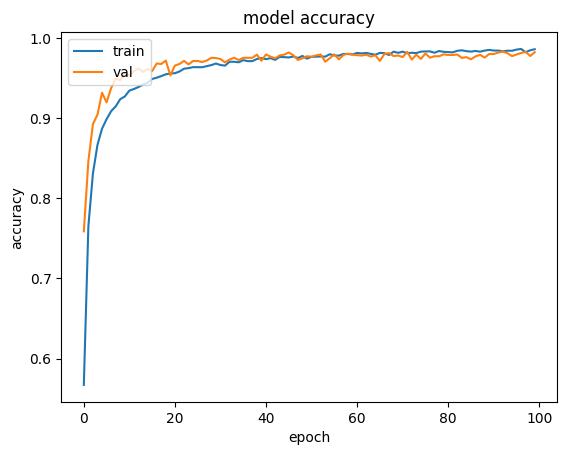

In [191]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [192]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

336/336 - 1s - 4ms/step - accuracy: 0.9809 - loss: 0.0826


In [193]:
from sklearn.metrics import classification_report

class_names = [
    "Actinic Keratoses",       # 0
    "Basal Cell Carcinoma",    # 1
    "Benign Keratosis",        # 2
    "Dermatofibroma",          # 3
    "Melanoma",                # 4
    "Nevus",                   # 5
    "Vascular Lesion",         # 6
    "Normal Skin"              # 7
]

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:\n")
print(classification_report(Y_test, y_pred, target_names=class_names, digits=2))


336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:

                      precision    recall  f1-score   support

   Actinic Keratoses       1.00      1.00      1.00      1361
Basal Cell Carcinoma       0.99      1.00      0.99      1370
    Benign Keratosis       0.94      0.99      0.97      1319
      Dermatofibroma       1.00      1.00      1.00      1275
            Melanoma       0.98      0.88      0.93      1363
               Nevus       1.00      1.00      1.00      1330
     Vascular Lesion       0.95      0.98      0.97      1370
         Normal Skin       1.00      1.00      1.00      1340

            accuracy                           0.98     10728
           macro avg       0.98      0.98      0.98     10728
        weighted avg       0.98      0.98      0.98     10728



# Task
Use the Kaggle dataset "mahmoudreda55/chest-xray-and-ct-scan-images" to train a model.

## Install kaggle library

### Subtask:
Install the necessary library to interact with the Kaggle API.


**Reasoning**:
Install the kaggle library using pip.



In [194]:
!pip install kaggle

## Upload kaggle api key

### Subtask:
Provide your Kaggle API credentials to Colab for authentication.


**Reasoning**:
Create the .kaggle directory and move the kaggle.json file into it, then set the permissions for the file.



In [195]:
import os
import stat

# Create .kaggle directory if it doesn't exist
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

# Move kaggle.json to the .kaggle directory
# This step assumes you have manually uploaded the kaggle.json file to the Colab environment's root.
# If the file is in a different location, adjust the source path accordingly.
source_path = '/content/kaggle.json'
destination_path = '/root/.kaggle/kaggle.json'

if os.path.exists(source_path):
    os.rename(source_path, destination_path)
    print(f"Moved {source_path} to {destination_path}")

    # Set file permissions (read and write for the owner only)
    os.chmod(destination_path, stat.S_IRUSR | stat.S_IWUSR)
    print(f"Set permissions for {destination_path}")
else:
    print(f"Error: {source_path} not found. Please upload the kaggle.json file.")

Error: /content/kaggle.json not found. Please upload the kaggle.json file.


## Upload kaggle api key

### Subtask:
Provide your Kaggle API credentials to Colab for authentication.


**Reasoning**:
Execute the provided Python code to create the `.kaggle` directory, move the uploaded `kaggle.json` file into it, and set the appropriate file permissions for security.



In [196]:
import os
import stat

# Create .kaggle directory if it doesn't exist
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

# Move kaggle.json to the .kaggle directory
# This step assumes you have manually uploaded the kaggle.json file to the Colab environment's root.
# If the file is in a different location, adjust the source path accordingly.
source_path = '/content/kaggle.json'
destination_path = '/root/.kaggle/kaggle.json'

if os.path.exists(source_path):
    os.rename(source_path, destination_path)
    print(f"Moved {source_path} to {destination_path}")

    # Set file permissions (read and write for the owner only)
    os.chmod(destination_path, stat.S_IRUSR | stat.S_IWUSR)
    print(f"Set permissions for {destination_path}")
else:
    print(f"Error: {source_path} not found. Please upload the kaggle.json file.")

Error: /content/kaggle.json not found. Please upload the kaggle.json file.


## Upload kaggle api key (retry)

### Subtask:
Provide your Kaggle API credentials to Colab for authentication.


**Reasoning**:
Create the .kaggle directory, move the kaggle.json file, and set its permissions.



In [197]:
import os
import stat

# Create .kaggle directory if it doesn't exist
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

# Move kaggle.json to the .kaggle directory
# This step assumes you have manually uploaded the kaggle.json file to the Colab environment's root.
# If the file is in a different location, adjust the source path accordingly.
source_path = '/content/kaggle.json'
destination_path = '/root/.kaggle/kaggle.json'

if os.path.exists(source_path):
    os.rename(source_path, destination_path)
    print(f"Moved {source_path} to {destination_path}")

    # Set file permissions (read and write for the owner only)
    os.chmod(destination_path, stat.S_IRUSR | stat.S_IWUSR)
    print(f"Set permissions for {destination_path}")
else:
    print(f"Error: {source_path} not found. Please upload the kaggle.json file.")

Error: /content/kaggle.json not found. Please upload the kaggle.json file.
